# Image Classifier Data Prep

In [3]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import model_from_json
from numpy import save

In [2]:
directory = r'C:\Users\Cl3rity\OneDrive - National University of Singapore\Classifier\dogscats\train'
categories = ['cats', 'dogs']

First we need to get the image arrays

We also need to give them labels 0 and 1 for cats or dogs

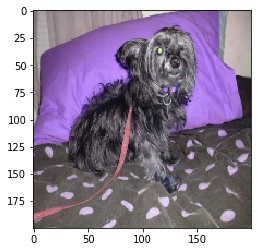

In [3]:
# testing out the first image
img_size = 200 #need to be sufficiently high to differentiate the images

for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img) # obtaining the unique file path for the particular image file
        img_arr = cv2.imread(img_path) # saving the image into an image array
        img_arr = cv2.resize(img_arr/255, (img_size,img_size))
        plt.imshow(img_arr)
        break

In [4]:
# looping through all the images
img_size = 100 #need to be sufficiently high to differentiate the images
data = []

for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img) # obtaining the unique file path for the particular image file
        img_arr = cv2.imread(img_path) # saving the image into an image array
        img_arr = cv2.resize(img_arr/255, (img_size,img_size))
        data.append([img_arr, label])

Before we use the dataset, we need to make sure that the data is sufficiently shuffled such that cats do not all come before dogs

In [5]:
random.shuffle(data)

In [6]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [7]:
X = np.array(X)
y = np.array(y)

In [37]:
save('X.npy', X)
save('y.npy', y)

# Image Classifier - Model Training

In [2]:
# preparing the necessary modules from keras in order to perform the convolution
# ,maxpooling and flattening that is required in Convolutional Neural Networks

from numpy import load
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [42]:
#load the previously saved datasets
X = load('X.npy')
y = load('y.npy')

In [10]:
model = Sequential()

model.add(Conv2D(64,(3,3), activation = 'relu' )) # 64 layers of convolution layers of 3 by 3 features
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation = 'relu' ))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu')) # need to pass shape of 1 input --> (200,200,3)

model.add(Dense(128, activation = 'relu'))

model.add(Dense(2, activation = 'softmax')) # 2 neurons because either cat or dog; softmax or sigmoid because it is a yes or no

In [11]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# adam is the go to optimoiser for most cases, sparse_categorical since we have 2 categories

In [12]:
model.fit(X,y,epochs=5, validation_split=0.1, batch_size = 32)

Epoch 1/5
647/647 [==============================] - 362s 555ms/step - loss: 0.6412 - accuracy: 0.6316 - val_loss: 0.5576 - val_accuracy: 0.7196
Epoch 2/5
647/647 [==============================] - 334s 516ms/step - loss: 0.5391 - accuracy: 0.7292 - val_loss: 0.5234 - val_accuracy: 0.7452
Epoch 3/5
647/647 [==============================] - 332s 514ms/step - loss: 0.4552 - accuracy: 0.7854 - val_loss: 0.4595 - val_accuracy: 0.7830
Epoch 4/5
647/647 [==============================] - 336s 519ms/step - loss: 0.3577 - accuracy: 0.8428 - val_loss: 0.4839 - val_accuracy: 0.7852
Epoch 5/5
647/647 [==============================] - 331s 512ms/step - loss: 0.2268 - accuracy: 0.9064 - val_loss: 0.5887 - val_accuracy: 0.7635


In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Testing the model

In [4]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [9]:
directory_test = r'C:\Users\Cl3rity\OneDrive - National University of Singapore\Classifier\dogscats\valid'
categories = ['cats', 'dogs']

In [10]:
# looping through all the images
img_size = 100 #need to be sufficiently high to differentiate the images
data_test = []

for category in categories:
    folder = os.path.join(directory_test, category)
    label = categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img) # obtaining the unique file path for the particular image file
        img_arr = cv2.imread(img_path) # saving the image into an image array
        img_arr = cv2.resize(img_arr/255, (img_size,img_size))
        data_test.append([img_arr, label])

In [11]:
X_test = []
y_test = []

for features, labels in data_test:
    X_test.append(features)
    y_test.append(labels)

In [12]:
X_test = np.array(X_test)
y_test = np.array(y_test)

save('X_test.npy', X_test)
save('y_test.npy', y_test)

In [6]:
#load the previously saved datasets
X_test = load('X_test.npy')
y_test = load('y_test.npy')

In [7]:
predict_x=loaded_model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [15]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
loaded_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
scores = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))

accuracy: 94.10%


In [16]:
loaded_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
scores = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))

accuracy: 75.75%
